In [178]:
import pandas as pd
import argparse, os, sys, json
import numpy as np

'''Converts an output asreview csv file to ris such that it can be imported into zotero'''

#
# Define functions
#
def format_authors(authors):
    '''
    Change authors format type to match that required by zotero, yielding a list of authors which will each be put on a separate line in the ris file outputted by the script
    '''
    au = []
    if isinstance(authors, str):  # don't bother if no authors are listed (as string)
        
        au = [x for x in authors.split('\'') if len(x)>2]  # excludes '[' and ']' and ', '
    return au

def csv_to_ris(input, output, ris_labels):
    '''
    Converts given csv file to ris file using pandas
    * preprocess
    * extract correct columns
    * map ris tag names to column names
    * create new file in ris format on a per row basis
    '''
    df = pd.read_csv(input, sep=';')
    
    # Add tags column as notes
    hackname = 'database_provider'
    df = pd.read_csv(input, sep=';')
    df[hackname] = pd.read_csv('220526_tags.txt',header=None).transpose()
    # df[hackname] = df[hackname].shift(10)

    include_columns = ['type_of_reference', 'title', 'authors', 'secondary_title', 'date', 'year', 'doi', 'volume', 'number', 'issn', 'short_title', 'url', 'keywords', 'abstract', 'start_page', 'end_page', 'accession_number', 'asreview_ranking', 'notes', 'custom2', 'custom7', hackname]  #asreview_ranking is included under ris label N1 - 'notes'
    # exclude_columns = ['record_id', 'database_provider', 'alternate_title1','language','secondary_authors', 'note', 'publisher', 'access date']  # for reference

    df['authors'] = df['authors'].apply(format_authors)

    # outputfile = input.split('.')[0] + '.ris'

    with open(output, 'w') as risfile:
        for i in range(len(df)):
            if df.iloc[[i]]['included'].item() == 1:  # If asreview includes it
                for col in include_columns:  # write the colums you chose to include
                    value = df.iloc[[i]][col]        
                    if ~value.isna().any():   # as long as it isn't nan             
                        if col == 'authors':  # ensure each author gets their own line
                            for au in value.item():
                                line = f'{ris_labels[col]}  - {au}\n'  # 'author' = AU
                                risfile.write(line)
                        else:
                            line = f'{ris_labels[col]}  - {value.item()}\n'
                            risfile.write(line)
            
                risfile.write('ER  - \n\n')  # Ris entries are split by ER -
    
    return risfile

In [179]:
#
# Get commandline arguments
#
# data_path = f'{os.getcwd()}/../../data/'
# sys.path.append(data_path)

# CLI = argparse.ArgumentParser(prog='csv_to_ris', description='Convert a csv file exported from asreview to a zotero-compatible ris file')

# CLI.add_argument('input',  type=str, default='input.csv',   help='name of asreview csv file')
# CLI.add_argument('output', type=str, default='output.ris',  help='desired name of ris output file')
# # CLI.add_argument('-input_dir',  type=str, default=os.getcwd(), help='path to folder containing asreview csv file')
# # CLI.add_argument('-output_dir', type=str, default=os.getcwd(), help='desired path to output ris file')

# args = CLI.parse_args()

# if not os.path.isfile(args.input):
#     print('The file specified does not exist')
#     sys.exit()

# Import ris labels dict from json (TODO: Fix)
# with open("ris_labels.json", "r") as in_handle:
#     ris_labels = json.load(in_handle)  # load dictionary
# For now just put label data here
ris_labels = {"first_authors": "A1", "secondary_authors": "A2", "tertiary_authors": "A3", "subsidiary_authors": "A4", "abstract": "AB", "author_address": "AD", "accession_number": "AN", "authors": "AU", "custom1": "C1", "custom2": "C2", "custom3": "C3", "custom4": "C4", "custom5": "C5", "custom6": "C6", "custom7": "C7", "custom8": "C8", "caption": "CA", "asreview_ranking": "CN", "place_published": "CY", "date": "DA", "name_of_database": "DB", "doi": "DO", "database_provider": "DP", "end_page": "EP", "end_of_reference": "ER", "edition": "ET", "id": "ID", "number": "IS", "alternate_title1": "J2", "alternate_title2": "JA", "alternate_title3": "JF", "journal_name": "JO", "keywords": "KW", "file_attachments1": "L1", "file_attachments2": "L2", "figure": "L4", "language": "LA", "label": "LB", "note": "M1", "type_of_work": "M3", "notes": "N1", "notes_abstract": "N2", "number_of_volumes": "NV", "original_publication": "OP", "publisher": "PB", "year": "PY", "reviewed_item": "RI", "research_notes": "RN", "reprint_edition": "RP", "section": "SE", "issn": "SN", "start_page": "SP", "short_title": "ST", "primary_title": "T1", "secondary_title": "T2", "tertiary_title": "T3", "translated_author": "TA", "title": "TI", "translated_title": "TT", "type_of_reference": "TY", "unknown_tag": "UK", "url": "UR", "volume": "VL", "publication_year": "Y1", "access_date": "Y2"}

#
# Convert
#
data_path = f'{os.getcwd()}/../../data/'
asreview_path = f'{os.getcwd()}/../asreview/output/'
sys.path.append(data_path)
input = f'{asreview_path}/asreview_result_220526-cliff.csv'
output = f'{asreview_path}/220526_asreview.ris'

# csv_to_ris(input, output, ris_labels)

In [175]:
hack_name = 'database_provider'
df = pd.read_csv(input, sep=';')
df[hack_name] = pd.read_csv('220526_tags.txt',header=None).transpose()

In [176]:
tags = df[hack_name].to_list()
tags = [x for x in tags if not str(x) == 'nan']
asnum = df['asreview_ranking'].to_list()
included = df['included'].to_list()
included = [x for x in included if x>0]

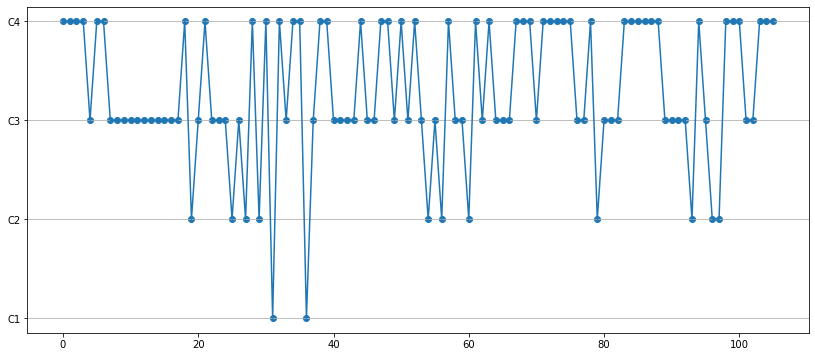

In [177]:
#plot tags versus index of tag
import matplotlib.pyplot as plt
tags = tags[:-1]
tags = [x.strip(' ') for x in tags]
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(range(len(tags)),tags)
ax.plot(range(len(tags)),tags)
ax.invert_yaxis()
ax.grid(axis='y')

In [166]:
len(tags)

107